# Testing functions in epydemiology

## Import epydemiology
(All other packages will be imported or reported missing.)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import epydemiology as epy

/Users/phil/Documents/python_projects/general_python34_projects/env34/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  return f(*args, **kwds)


## Some background details

In [3]:
help(epy)

Help on package epydemiology:

NAME
    epydemiology

DESCRIPTION
    # These are the functions that can be accessed from epydemiology.
    # Other functions that are used internally cannot be accessed
    # directly by end-users.

PACKAGE CONTENTS
    phjCalculateProportions
    phjCleanUKPostcodes
    phjExploreData
    phjExtFuncs
    phjGetDBData
    phjGetData
    phjMatrices
    phjPrelimPrepForSelectData
    phjRROR
    phjSelectData

FILE
    /Users/phil/Documents/phjPyPI/epydemiology/epydemiology/__init__.py




In [4]:
print(dir(epy))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'getJenksBreaks', 'phjBinaryVarsToSquareMatrix', 'phjCalculateBinomialProportions', 'phjCalculateMultinomialProportions', 'phjCalculateProportions', 'phjCategoriseContinuousVariable', 'phjCleanUKPostcodeVariable', 'phjCleanUKPostcodes', 'phjExploreData', 'phjExtFuncs', 'phjGetDBData', 'phjGetData', 'phjGetDataFromDatabase', 'phjMatrices', 'phjOddsRatio', 'phjRROR', 'phjReadDataFromExcelNamedCellRange', 'phjReadTextFromFile', 'phjRelativeRisk', 'phjSelectCaseControlDataset', 'phjSelectData', 'phjViewLogOdds']


---

## File: phjMatices.py

### Function: phjBinaryVarsToSquareMatrix()

#### Output a numpy array

In [5]:
rawDataDF = pd.DataFrame({'a':[0,1,1,1,0,0,1,0],
                          'b':[1,1,0,0,1,0,0,1],
                          'c':[0,0,1,0,1,1,1,1],
                          'd':[1,0,0,0,1,0,0,0],
                          'e':[1,0,0,0,0,1,0,0]})

columns = ['a','b','c','d','e']

print('Raw data')
print(rawDataDF)
print('\n')

phjMatrix = epy.phjBinaryVarsToSquareMatrix(phjDataDF = rawDataDF,
                                        phjColumnNamesList = columns,
                                        phjOutputFormat = 'arr',
                                        phjPrintResults = False)
                                        
print('Returned square matrix')
print(phjMatrix)

Raw data
   a  b  c  d  e
0  0  1  0  1  1
1  1  1  0  0  0
2  1  0  1  0  0
3  1  0  0  0  0
4  0  1  1  1  0
5  0  0  1  0  1
6  1  0  1  0  0
7  0  1  1  0  0


Returned square matrix
[[1 1 2 0 0]
 [1 0 2 2 1]
 [2 2 0 1 1]
 [0 2 1 0 1]
 [0 1 1 1 0]]


#### Output a Pandas dataframe

In [6]:
rawDataDF = pd.DataFrame({'a':[0,1,1,1,0,0,1,0],
                          'b':[1,1,0,0,1,0,0,1],
                          'c':[0,0,1,0,1,1,1,1],
                          'd':[1,0,0,0,1,0,0,0],
                          'e':[1,0,0,0,0,1,0,0]})

columns = ['a','b','c','d','e']

print('Raw data')
print(rawDataDF)
print('\n')

phjMatrix = epy.phjBinaryVarsToSquareMatrix(phjDataDF = rawDataDF,
                                            phjColumnNamesList = columns,
                                            phjOutputFormat = 'df',
                                            phjPrintResults = False)
                                        
print('Returned square matrix')
print(phjMatrix)

Raw data
   a  b  c  d  e
0  0  1  0  1  1
1  1  1  0  0  0
2  1  0  1  0  0
3  1  0  0  0  0
4  0  1  1  1  0
5  0  0  1  0  1
6  1  0  1  0  0
7  0  1  1  0  0


Returned square matrix
   a  b  c  d  e
a  1  1  2  0  0
b  1  0  2  2  1
c  2  2  0  1  1
d  0  2  1  0  1
e  0  1  1  1  0


---

## File: phjCleanUKPostcodes.py

### Function: phjCleanUKPostcodeVariable()

#### Clean postcodes based on format alone

In [7]:
import re

# Create test dataframe
myTestPostcodeDF = pd.DataFrame({'postcode': ['NP45DG',
                                              'CH647TE',
                                              'CH5 4HE',
                                              'GIR 0AA',
                                              'NOT NOWN',
                                              'GIR0AB',
                                              'NOR12A',
                                              'no idea',
                                              'W1A 1AA',
                                              'missin',
                                              'NP4  OGH',
                                              'P012 OLL',
                                              'p01s',
                                              'ABCD',
                                              '',
                                              'ab123cd',
                                              'un-known',
                                              'B1    INJ',
                                              'AB123CD',
                                              'No idea what the postcode is',
                                              '    ???NP4-5DG_*#   '],
                                 'pcdClean': np.nan,
                                 'pcd7': np.nan,
                                 'postcodeOutward': np.nan,
                                 'someOtherCol': np.nan})

# Run function to extract postcode data
print('\nStart dataframe\n===============\n')
print(myTestPostcodeDF)
print('\n')

myTestPostcodeDF = epy.phjCleanUKPostcodeVariable(phjTempDF = myTestPostcodeDF,
                                                  phjRealPostcodeSer = None,
                                                  phjOrigPostcodeVarName = 'postcode',
                                                  phjNewPostcodeVarName = 'pcdClean',
                                                  phjNewPostcodeStrLenVarName = 'pcdCleanStrLen',
                                                  phjPostcodeCheckVarName = 'pcdFormatCheck',
                                                  phjMissingValueCode = 'missing',
                                                  phjMinDamerauLevenshteinDistanceVarName = 'minDamLevDist',
                                                  phjBestAlternativesVarName = 'bestAlternatives',
                                                  phjPostcode7VarName = 'pcd7',
                                                  phjPostcodeAreaVarName = 'pcdArea',
                                                  phjSalvageOutwardPostcodeComponent = True,
                                                  phjCheckByOption = 'format',
                                                  phjDropExisting = True,
                                                  phjPrintResults = True)

print('\nReturned dataframe\n==================\n')
print(myTestPostcodeDF)


Start dataframe

    pcd7  pcdClean                      postcode  postcodeOutward  \
0    NaN       NaN                        NP45DG              NaN   
1    NaN       NaN                       CH647TE              NaN   
2    NaN       NaN                       CH5 4HE              NaN   
3    NaN       NaN                       GIR 0AA              NaN   
4    NaN       NaN                      NOT NOWN              NaN   
5    NaN       NaN                        GIR0AB              NaN   
6    NaN       NaN                        NOR12A              NaN   
7    NaN       NaN                       no idea              NaN   
8    NaN       NaN                       W1A 1AA              NaN   
9    NaN       NaN                        missin              NaN   
10   NaN       NaN                      NP4  OGH              NaN   
11   NaN       NaN                      P012 OLL              NaN   
12   NaN       NaN                          p01s              NaN   
13   NaN       N

                        postcode  someOtherCol pcdClean pcdFormatCheck  \
0                         NP45DG           NaN   NP45DG           True   
1                        CH647TE           NaN  CH647TE           True   
2                        CH5 4HE           NaN   CH54HE           True   
3                        GIR 0AA           NaN   GIR0AA           True   
4                       NOT NOWN           NaN  missing            NaN   
5                         GIR0AB           NaN  missing          False   
6                         NOR12A           NaN   NOR12A           True   
7                        no idea           NaN  missing          False   
8                        W1A 1AA           NaN   W1A1AA           True   
9                         missin           NaN  missing            NaN   
10                      NP4  OGH           NaN   NP40GH           True   
11                      P012 OLL           NaN  PO120LL           True   
12                          p01s      

/Users/phil/Documents/phjPyPI/epydemiology/epydemiology/phjCleanUKPostcodes.py:401: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  phjPostcodeCheckVarName]]
/Users/phil/Documents/python_projects/general_python34_projects/env34/lib/python3.4/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Users/phil/Documents/phjPyPI/epydemiology/epydemiology/phjCleanUKPostcodes.py:610: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  (phjTempDF[phjNew

#### Clean postcodes based on real postcode and identify closest matches

In [8]:
import re

# N.B. When calculating best alternative postcodes, only postcodes that are within
# 1 DL distance are considered.

# Create a Pandas series that could contain all the postcodes in the UK
realPostcodesSer = pd.Series(['NP4 5DG','CH647TE','CH5 4HE','W1A 1AA','NP4 0GH','PO120LL','AB123CF','AB124DF','AB123CV'])

# Create test dataframe
myTestPostcodeDF = pd.DataFrame({'postcode': ['NP45DG',
                                              'CH647TE',
                                              'CH5 4HE',
                                              'GIR 0AA',
                                              'NOT NOWN',
                                              'GIR0AB',
                                              'NOR12A',
                                              'no idea',
                                              'W1A 1AA',
                                              'missin',
                                              'NP4  OGH',
                                              'P012 OLL',
                                              'p01s',
                                              'ABCD',
                                              '',
                                              'ab123cd',
                                              'un-known',
                                              'B1    INJ',
                                              'AB123CD',
                                              'No idea what the postcode is',
                                              '    ???NP4-5DG_*#   '],
                                 'pcdClean': np.nan,
                                 'pcd7': np.nan,
                                 'postcodeOutward': np.nan,
                                 'someOtherCol': np.nan})

# Run function to extract postcode data
print('\nStart dataframe\n===============\n')
print(myTestPostcodeDF)
print('\n')

myTestPostcodeDF = epy.phjCleanUKPostcodeVariable(phjTempDF = myTestPostcodeDF,
                                                  phjRealPostcodeSer = realPostcodesSer,
                                                  phjOrigPostcodeVarName = 'postcode',
                                                  phjNewPostcodeVarName = 'pcdClean',
                                                  phjNewPostcodeStrLenVarName = 'pcdCleanStrLen',
                                                  phjPostcodeCheckVarName = 'pcdFormatCheck',
                                                  phjMissingValueCode = 'missing',
                                                  phjMinDamerauLevenshteinDistanceVarName = 'minDamLevDist',
                                                  phjBestAlternativesVarName = 'bestAlternatives',
                                                  phjPostcode7VarName = 'pcd7',
                                                  phjPostcodeAreaVarName = 'pcdArea',
                                                  phjSalvageOutwardPostcodeComponent = True,
                                                  phjCheckByOption = 'dictionary',
                                                  phjDropExisting = True,
                                                  phjPrintResults = True)

print('\nReturned dataframe\n==================\n')
print(myTestPostcodeDF)


Start dataframe

    pcd7  pcdClean                      postcode  postcodeOutward  \
0    NaN       NaN                        NP45DG              NaN   
1    NaN       NaN                       CH647TE              NaN   
2    NaN       NaN                       CH5 4HE              NaN   
3    NaN       NaN                       GIR 0AA              NaN   
4    NaN       NaN                      NOT NOWN              NaN   
5    NaN       NaN                        GIR0AB              NaN   
6    NaN       NaN                        NOR12A              NaN   
7    NaN       NaN                       no idea              NaN   
8    NaN       NaN                       W1A 1AA              NaN   
9    NaN       NaN                        missin              NaN   
10   NaN       NaN                      NP4  OGH              NaN   
11   NaN       NaN                      P012 OLL              NaN   
12   NaN       NaN                          p01s              NaN   
13   NaN       N

/Users/phil/Documents/phjPyPI/epydemiology/epydemiology/phjCleanUKPostcodes.py:401: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  phjPostcodeCheckVarName]]
/Users/phil/Documents/python_projects/general_python34_projects/env34/lib/python3.4/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


   Returned list of edits: [1, ['AB123CF', 'AB123CV']]

Consider first postcode entry: B11NJ
   Returned list of edits: [4, None]

Consider first postcode entry: AB123CD
   Returned list of edits: [1, ['AB123CF', 'AB123CV']]


Final working postcode dataframe

                        postcode pcdClean pcdFormatCheck  pcdCleanStrLen  \
0                         NP45DG   NP45DG           True             6.0   
1                        CH647TE  CH647TE           True             7.0   
2                        CH5 4HE   CH54HE           True             6.0   
3                        GIR 0AA  missing          False             6.0   
4                       NOT NOWN  missing            NaN             7.0   
5                         GIR0AB  missing          False             6.0   
6                         NOR12A  missing          False             6.0   
7                        no idea  missing          False             6.0   
8                        W1A 1AA   W1A1AA           Tru

/Users/phil/Documents/python_projects/general_python34_projects/env34/lib/python3.4/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


## File: phjSelectData.py

### Function: phjSelectCaseControlDataset()

#### Unmatched controls

In [9]:
casesDF = pd.DataFrame({'animalID':[1,2,3,4,5],'var1':[43,45,34,45,56],'sp':['dog','dog','dog','dog','dog']})
potControlsDF = pd.DataFrame({'animalID':[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
                              'var1':[34,54,34,23,34,45,56,67,56,67,78,98,65,54,34,76,87,56,45,34],
                              'sp':['dog','cat','dog','dog','cat','dog','cat','dog','cat','dog',
                                    'dog','dog','dog','cat','dog','cat','dog','dog','dog','cat']})

print("This dataframe contains all the cases of disease\n")
print(casesDF)
print("\n")
print("This dataframe contains all the animals you could potentially use as controls\n")
print(potControlsDF)
print("\n")

# Selecting unmatched controls
unmatchedDF = epy.phjSelectCaseControlDataset(phjCasesDF = casesDF,
                                              phjPotentialControlsDF = potControlsDF,
                                              phjUniqueIdentifierVarName = 'animalID',
                                              phjMatchingVariablesList = None,
                                              phjControlsPerCaseInt = 2,
                                              phjPrintResults = False)

print(unmatchedDF)

This dataframe contains all the cases of disease

   animalID   sp  var1
0         1  dog    43
1         2  dog    45
2         3  dog    34
3         4  dog    45
4         5  dog    56


This dataframe contains all the animals you could potentially use as controls

    animalID   sp  var1
0         11  dog    34
1         12  cat    54
2         13  dog    34
3         14  dog    23
4         15  cat    34
5         16  dog    45
6         17  cat    56
7         18  dog    67
8         19  cat    56
9         20  dog    67
10        21  dog    78
11        22  dog    98
12        23  dog    65
13        24  cat    54
14        25  dog    34
15        26  cat    76
16        27  dog    87
17        28  dog    56
18        29  dog    45
19        30  cat    34


UNMATCHED CONTROLS

    case  animalID
0      1         1
1      1         2
2      1         3
3      1         4
4      1         5
5      0        24
6      0        26
7      0        20
8      0        25
9      0       

#### Matched controls

In [10]:
casesDF = pd.DataFrame({'animalID':[1,2,3,4,5],'var1':[43,45,34,45,56],'sp':['dog','dog','dog','dog','dog']})
potControlsDF = pd.DataFrame({'animalID':[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
                              'var1':[34,54,34,23,34,45,56,67,56,67,78,98,65,54,34,76,87,56,45,34],
                              'sp':['dog','cat','dog','dog','cat','dog','cat','dog','cat','dog',
                                    'dog','dog','dog','cat','dog','cat','dog','dog','dog','cat']})

print("This dataframe contains all the cases of disease\n")
print(casesDF)
print("\n")
print("This dataframe contains all the animals you could potentially use as controls\n")
print(potControlsDF)
print("\n")

# Selecting controls that are matched to cases on variable 'sp'
matchedDF = epy.phjSelectCaseControlDataset(phjCasesDF = casesDF,
                                            phjPotentialControlsDF = potControlsDF,
                                            phjUniqueIdentifierVarName = 'animalID',
                                            phjMatchingVariablesList = ['sp'],
                                            phjControlsPerCaseInt = 2,
                                            phjPrintResults = False)

print(matchedDF)

This dataframe contains all the cases of disease

   animalID   sp  var1
0         1  dog    43
1         2  dog    45
2         3  dog    34
3         4  dog    45
4         5  dog    56


This dataframe contains all the animals you could potentially use as controls

    animalID   sp  var1
0         11  dog    34
1         12  cat    54
2         13  dog    34
3         14  dog    23
4         15  cat    34
5         16  dog    45
6         17  cat    56
7         18  dog    67
8         19  cat    56
9         20  dog    67
10        21  dog    78
11        22  dog    98
12        23  dog    65
13        24  cat    54
14        25  dog    34
15        26  cat    76
16        27  dog    87
17        28  dog    56
18        29  dog    45
19        30  cat    34


MATCHED CONTROLS

   animalID group case   sp
0         1     0    1  dog
1        25     0    0  dog
2        27     0    0  dog
3         2     1    1  dog
4        23     1    0  dog
5        20     1    0  dog
6         3

---

## File: phjCalculateProportions.py

### Function: phjCalculateBinomialProportions()

In [11]:
# Create example dataset

### Function: phjCalculateMultinomialProportions()

In [12]:
# Create example dataset

---

## File: phjExploreData.py

### Function: phjCategoriseContinuousVariable()

#### Return dataframe alone

In [13]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':['yes']*50000 + ['no']*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# Categorise a continuous variable
phjTempDF = epy.phjCategoriseContinuousVariable(phjTempDF = phjTempDF,
                                                phjContinuousVarName = 'riskFactorCont',
                                                phjMissingValue = 'missing',
                                                phjNumberOfCategoriesInt = 6,
                                                phjNewCategoryVarName = 'catVar',
                                                phjCategorisationMethod = 'jenks',
                                                phjReturnBreaks = False,
                                                phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print('\nLog odds for categorised variable')
    print(phjTempDF)

      binDepVar  riskFactorCont
0           yes        0.847229
1           yes        0.527968
2           yes        0.778623
3           yes        0.837133
4           yes        0.543730
...         ...             ...
99995        no        0.693838
99996        no        0.287174
99997        no        0.913793
99998        no        0.953619
99999        no        0.082248

[100000 rows x 2 columns]

Log odds for categorised variable
      binDepVar  riskFactorCont  catVar
0           yes        0.847229       5
1           yes        0.527968       3
2           yes        0.778623       4
3           yes        0.837133       5
4           yes        0.543730       3
...         ...             ...     ...
99995        no        0.693838       4
99996        no        0.287174       1
99997        no        0.913793       5
99998        no        0.953619       5
99999        no        0.082248       0

[100000 rows x 3 columns]


#### Return dataframe and list of breaks

In [14]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':['yes']*50000 + ['no']*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# Categorise a continuous variable
phjTempDF, phjBreaksList = epy.phjCategoriseContinuousVariable(phjTempDF = phjTempDF,
                                                               phjContinuousVarName = 'riskFactorCont',
                                                               phjMissingValue = 'missing',
                                                               phjNumberOfCategoriesInt = 6,
                                                               phjNewCategoryVarName = 'catVar',
                                                               phjCategorisationMethod = 'jenks',
                                                               phjReturnBreaks = True,
                                                               phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print('\nCategorised variable')
    print(phjTempDF)
    print('\n')
    print('Breaks')
    print(phjBreaksList)

      binDepVar  riskFactorCont
0           yes        0.348237
1           yes        0.049605
2           yes        0.869952
3           yes        0.680856
4           yes        0.277225
...         ...             ...
99995        no        0.582817
99996        no        0.708407
99997        no        0.786821
99998        no        0.424379
99999        no        0.284945

[100000 rows x 2 columns]

Categorised variable
      binDepVar  riskFactorCont  catVar
0           yes        0.348237       2
1           yes        0.049605       0
2           yes        0.869952       5
3           yes        0.680856       4
4           yes        0.277225       1
...         ...             ...     ...
99995        no        0.582817       3
99996        no        0.708407       4
99997        no        0.786821       4
99998        no        0.424379       2
99999        no        0.284945       1

[100000 rows x 3 columns]


Breaks
[5.3345142429114254e-06, 0.16019953145101651, 0.329

### Function: phjViewLogOdds()
Example of viewing log odds plotted against mid-point of categories.

#### Categorise using Jenks breaks and using 'yes' and 'no' as binary outcome

      binDepVar  riskFactorCont
0           yes        0.577280
1           yes        0.881256
2           yes        0.656410
3           yes        0.771945
4           yes        0.055984
...         ...             ...
99995        no        0.229684
99996        no        0.019956
99997        no        0.806432
99998        no        0.178618
99999        no        0.829265

[100000 rows x 2 columns]


/Users/phil/Documents/phjPyPI/epydemiology/epydemiology/phjRROR.py:70: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  phjContTable.set_value(phjStratum,'95pcCI_Woolf',phjRiskFactorCI)


Log odds for categorised variable
                  yes     no      odds        or      95pcCI_Woolf   logodds  \
categoricalVar                                                                 
0                8633   8836  0.977026  0.968071  [0.9290, 1.0087] -0.023242   
1                9492   9405  1.009250  1.000000               ---  0.009208   
2               10328  10303  1.002426  0.993239  [0.9548, 1.0332]  0.002424   
3               10514  10505  1.000857  0.991683  [0.9535, 1.0314]  0.000856   
4               11033  10951  1.007488  0.998254  [0.9602, 1.0378]  0.007460   

                      se  95CI_llimit  95CI_ulimit  catMidpoints  
categoricalVar                                                    
0               0.015133    -0.052902     0.006418      0.087153  
1               0.014549    -0.019308     0.037724      0.269074  
2               0.013924    -0.024867     0.029714      0.465912  
3               0.013795    -0.026181     0.027894      0.673175  
4  

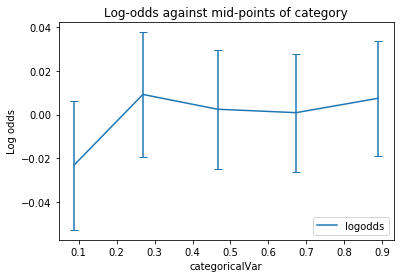

In [15]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':['yes']*50000 + ['no']*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# View log odds
phjTempDF = epy.phjViewLogOdds(phjTempDF = phjTempDF,
                               phjBinaryDepVarName = 'binDepVar',
                               phjContIndepVarName = 'riskFactorCont',
                               phjCaseValue = 'yes',
                               phjMissingValue = 'missing',
                               phjNumberOfCategoriesInt = 5,
                               phjNewCategoryVarName = 'categoricalVar',
                               phjCategorisationMethod = 'jenks',
                               phjGroupNameVar = None,
                               phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 10):
    print('Log odds for categorised variable')
    print(phjTempDF)

#### Categorise using quantile breaks and using 1 and 0 as binary outcome

       binDepVar  riskFactorCont
0              1        0.065738
1              1        0.342792
2              1        0.933948
3              1        0.814206
4              1        0.923330
...          ...             ...
99995          0        0.963796
99996          0        0.330541
99997          0        0.750400
99998          0        0.481129
99999          0        0.226308

[100000 rows x 2 columns]


/Users/phil/Documents/phjPyPI/epydemiology/epydemiology/phjRROR.py:70: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  phjContTable.set_value(phjStratum,'95pcCI_Woolf',phjRiskFactorCI)


Log odds for categorised variable
                   1     0      odds        or      95pcCI_Woolf   logodds  \
categoricalVar                                                               
0               6350  6274  1.012113  1.030023  [0.9802, 1.0823]  0.012041   
1               6160  6269  0.982613  1.000000               --- -0.017540   
2               6368  6350  1.002835  1.020580  [0.9713, 1.0723]  0.002831   
3               6309  6293  1.002543  1.020282  [0.9710, 1.0721]  0.002539   
4               6099  6205  0.982917  1.000310  [0.9517, 1.0514] -0.017231   
5               6263  6227  1.005781  1.023578  [0.9740, 1.0757]  0.005765   
6               6134  6124  1.001633  1.019357  [0.9697, 1.0715]  0.001632   
7               6317  6258  1.009428  1.027290  [0.9776, 1.0795]  0.009384   

                      se  95CI_llimit  95CI_ulimit  catMidpoints  
categoricalVar                                                    
0               0.017801    -0.022848     0.046930 

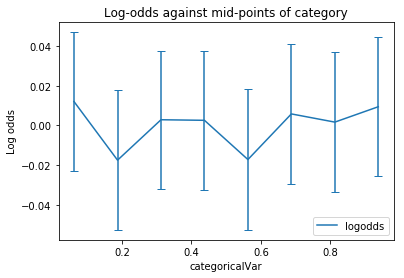

In [16]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':[1]*50000 + [0]*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# View log odds
phjTempDF = epy.phjViewLogOdds(phjTempDF = phjTempDF,
                               phjBinaryDepVarName = 'binDepVar',
                               phjContIndepVarName = 'riskFactorCont',
                               phjCaseValue = 1,
                               phjMissingValue = 'missing',
                               phjNumberOfCategoriesInt = 8,
                               phjNewCategoryVarName = 'categoricalVar',
                               phjCategorisationMethod = 'quantile',
                               phjGroupNameVar = None,
                               phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 10):
    print('Log odds for categorised variable')
    print(phjTempDF)

---